In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.tabular import *

In [3]:
import pandas as pd
np.set_printoptions(threshold=50, edgeitems=20)

PATH = 'fixed/data/'

In [4]:
# from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [5]:
d=pd.read_pickle('df_fixed.pkl')

In [6]:
p=d.drop(['atom_name', 'residue_name', 'chain_id', 'residue_number','b_factor', 'atom_number','element_symbol', 'x_ca', 'y_ca', 'z_ca'],axis=1)
p.head()

,x_coord,y_coord,z_coord
0,-17.932,5.235,4.057
1,-19.289,5.514,3.562
2,-19.342,6.462,2.300
3,-19.767,6.029,1.234
4,-20.099,6.097,4.709


In [7]:
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

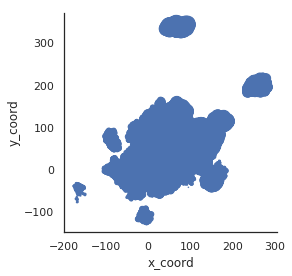

In [8]:
sns.FacetGrid(p, size=4) \
   .map(plt.scatter, "x_coord", "y_coord","z_coord") \
   .add_legend();

In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(p)
p_scaled_array = scaler.transform(p)
p_scaled = pd.DataFrame(p_scaled_array, columns = p.columns)

p_scaled.sample(5)

,x_coord,y_coord,z_coord
192621,0.146464,-0.080313,-0.058056
213745,-0.823785,-1.053833,-0.343016
170225,-0.667519,0.956609,-0.280822
65795,0.034852,1.235061,2.717341
239555,0.961555,0.188238,-0.158117


# Gaussian Mixture Model (GMM) Clustering

In [10]:
nclusters = 12

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(p)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(p)
y_cluster_gmm

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, ...,  6, 10,  6,  6,  6,  6, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [12]:
gmm.means_

array([[  42.242859,   82.837457,   55.65036 ],
       [  16.118835,   27.139457,   86.593582],
       [   3.03933 ,    7.399355,    4.224883],
       [ 144.584368,   84.896077,  119.011668],
       [  -9.697274,  -19.098574, -193.64202 ],
       [  20.409363,   14.163339,   47.097653],
       [  17.197536,   52.425105,   14.75667 ],
       [ -10.697016,    6.949883,    5.171262],
       [  87.649069,   -8.269162,    3.585378],
       [  71.446423,  148.391975,  180.361953],
       [  37.025873,   32.496903,   16.715889],
       [-164.651396,  -51.523216,   -8.655978]])

In [13]:
cluster_means = pd.DataFrame(gmm.means_)

In [14]:
cluster_means.to_pickle('gmm_means_12.pkl')

In [15]:
d['cluster'] = y_cluster_gmm

In [16]:
d.head()

,atom_number,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,element_symbol,x_ca,y_ca,z_ca,cluster
0,1,N,PHE,1,1,-17.932,5.235,4.057,0.0,N,-19.289,5.514,3.562,2
1,2,CA,PHE,1,1,-19.289,5.514,3.562,0.0,C,-19.289,5.514,3.562,2
2,3,C,PHE,1,1,-19.342,6.462,2.300,0.0,C,-19.289,5.514,3.562,2
3,4,O,PHE,1,1,-19.767,6.029,1.234,0.0,O,-19.289,5.514,3.562,2
4,5,CB,PHE,1,1,-20.099,6.097,4.709,0.0,C,-19.289,5.514,3.562,2


In [17]:
d.to_pickle('12_gmm.pkl')

In [74]:
df=pd.read_pickle('12_gmm.pkl')

In [75]:
df.head(20)

,atom_number,atom_name,residue_name,chain_id,residue_number,x_coord,y_coord,z_coord,b_factor,element_symbol,x_ca,y_ca,z_ca,cluster
0,1,N,PHE,1,1,-17.932,5.235,4.057,0.0,N,-19.289,5.514,3.562,2
1,2,CA,PHE,1,1,-19.289,5.514,3.562,0.0,C,-19.289,5.514,3.562,2
2,3,C,PHE,1,1,-19.342,6.462,2.300,0.0,C,-19.289,5.514,3.562,2
3,4,O,PHE,1,1,-19.767,6.029,1.234,0.0,O,-19.289,5.514,3.562,2
4,5,CB,PHE,1,1,-20.099,6.097,4.709,0.0,C,-19.289,5.514,3.562,2
5,6,CG,PHE,1,1,-21.559,6.092,4.496,0.0,C,-19.289,5.514,3.562,2
6,7,CD1,PHE,1,1,-22.286,4.925,4.670,0.0,C,-19.289,5.514,3.562,2
7,8,CD2,PHE,1,1,-22.231,7.244,4.111,0.0,C,-19.289,5.514,3.562,2
8,9,CE1,PHE,1,1,-23.668,4.909,4.479,0.0,C,-19.289,5.514,3.562,2
9,10,CE2,PHE,1,1,-23.625,7.231,3.923,0.0,C,-19.289,5.514,3.562,2


In [76]:
cluster_0 = df[df.cluster == 0]
cluster_1 = df[df.cluster == 1]
cluster_2 = df[df.cluster == 2]
cluster_3 = df[df.cluster == 3]
cluster_4 = df[df.cluster == 4]
cluster_5 = df[df.cluster == 5]
cluster_6 = df[df.cluster == 6]
cluster_7 = df[df.cluster == 7]
cluster_8 = df[df.cluster == 8]
cluster_9 = df[df.cluster == 9]
cluster_10 = df[df.cluster == 10]
cluster_11 = df[df.cluster == 11]

In [77]:
cluster_5.columns

Index(['atom_number', 'atom_name', 'residue_name', 'chain_id',
       'residue_number', 'x_coord', 'y_coord', 'z_coord', 'b_factor',
       'element_symbol', 'x_ca', 'y_ca', 'z_ca', 'cluster'],
      dtype='object')

In [78]:
cat_vars = ['atom_number','atom_name', 'residue_name',
       'residue_number','element_symbol','cluster']

In [79]:
cont_vars = ['x_coord', 'y_coord', 'z_coord','x_ca', 'y_ca', 'z_ca']

In [80]:
n = len(df); n

350000

In [81]:
df = df.drop(['chain_id','b_factor'],axis=1)

In [82]:
categorify = Categorify(cat_vars,cont_vars)
categorify(df)

In [95]:
df['atom_name'].cat.codes

0      62
1       1
2       0
3      71
4       2
5      10
6       4
7       5
8       7
9       8
10     14
11     62
12      1
13      0
14     71
15      2
16     10
17      3
18     62
19      1
20      0
21     71
22      2
23     10
24     80
25      6
26     62
27      1
28      0
29     71
       ..
392    11
393    12
394    62
395     1
396     0
397    71
398     2
399    10
400     3
401     6
402    70
403    62
404     1
405     0
406    71
407     2
408    62
409     1
410     0
411    71
412     2
413    10
414     4
415     5
416    66
417     8
418     9
419    15
420    16
421    13
Length: 350000, dtype: int8

In [96]:
for v in cat_vars:
    df[v] = df[v].cat.codes

In [109]:
df.head()

,atom_number,atom_name,residue_name,residue_number,x_coord,y_coord,z_coord,element_symbol,x_ca,y_ca,z_ca,cluster
0,0,62,13,0,-17.932,5.235,4.057,2,-19.289,5.514,3.562,2
1,1,1,13,0,-19.289,5.514,3.562,0,-19.289,5.514,3.562,2
2,2,0,13,0,-19.342,6.462,2.300,0,-19.289,5.514,3.562,2
3,3,71,13,0,-19.767,6.029,1.234,3,-19.289,5.514,3.562,2
4,4,2,13,0,-20.099,6.097,4.709,0,-19.289,5.514,3.562,2


In [98]:

valid_idx = range(20000)

In [99]:
procs=[FillMissing, Categorify, Normalize]

In [100]:
dep_var = ['x_coord', 'y_coord', 'z_coord']

In [101]:
trin_df = df.iloc[:320000]
valid_df = df.iloc[320000:]

In [110]:
data = (TabularList.from_df(df, path=PATH, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                           .split_by_idx(valid_idx)
                           .label_from_df(cols=dep_var,label_cls=FloatList)
                           .databunch())

In [103]:
df.x_coord.dtype

dtype('float64')

In [111]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04)

In [112]:
learn.model


TabularModel(
  (embeds): ModuleList(
    (0): Embedding(7489, 236)
    (1): Embedding(83, 19)
    (2): Embedding(21, 9)
    (3): Embedding(596, 57)
    (4): Embedding(6, 4)
    (5): Embedding(13, 7)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=338, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=500, out_features=3, bias=True)
  )
)

In [113]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


TypeError: Traceback (most recent call last):
  File "/home/b/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/b/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/b/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/fastai/data_block.py", line 447, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/home/b/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/fastai/data_block.py", line 82, in __getitem__
    if isinstance(try_int(idxs), int): return self.get(idxs)
  File "/home/b/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/fastai/data_block.py", line 327, in get
    return FloatItem(log(o) if self.log else o)
  File "/home/b/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/fastai/torch_core.py", line 250, in __init__
    def __init__(self,obj): self.data,self.obj = tensor(obj),obj
  File "/home/b/anaconda3/envs/fastai_v1/lib/python3.6/site-packages/fastai/torch_core.py", line 68, in tensor
    return torch.tensor(x) if is_listy(x) else as_tensor(x)
TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: double, float, float16, int64, int32, and uint8.


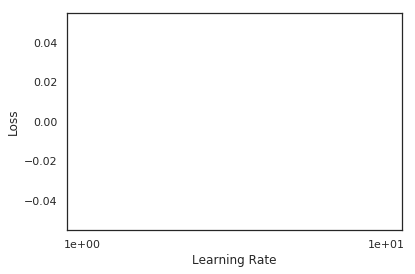

In [44]:
learn.recorder.plot()